In [136]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.stats import expon

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Q2

### (c)

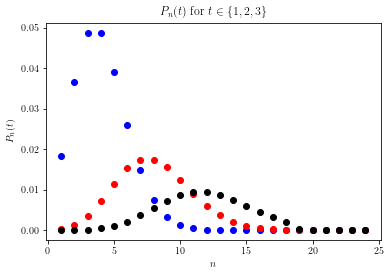

In [2]:
lam = 4

time = [1, 2, 3]
n = np.arange(1, 25)
P = [[], [], []]

for t in range(1, len(time) + 1):
    for i in range(len(n)):
        P[t-1].append((lam * t)**(n[i] - 1) * np.exp(-lam * t) / math.factorial(n[i]))
        # Add some text for labels, title and custom x-axis tick labels, etc.

fig, ax = plt.subplots()
ax.set_ylabel(r'$P_n(t)$')
ax.set_xlabel(r'$n$')
ax.set_title(r'$P_n(t)$ for  $t \in \{1, 2, 3\}$')
ax.plot(n, P[0], 'bo', n, P[1], 'ro', n, P[2], 'ko')
plt.show()

The location of the mean value of distribution seems to shift across the $n$-axis and also the "spread" of values of the distribution also seems to be increasing. This is expected as both position of the mean value and variance of the distribution are given by $\lambda t + 1$, which for a constant value of $\lambda$ increases linearly with $t$.

## Q5

### (a)

In [137]:
delta_t = 0.25
alpha = 0.5
nsteps = int(10 / delta_t)

N = np.zeros((10, nsteps))
steps = np.arange(0, nsteps)
steps = [v * delta_t for v in steps]

for j in range(10):
    for i in range(1, nsteps):
        r = random.random()
        if alpha * delta_t >= r:
            N[j][i] = N[j][i-1] + 1
        else:
            N[j][i] = N[j][i-1]

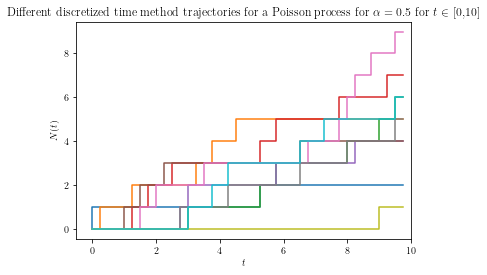

In [138]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$N(t)$')
ax.set_xlabel(r'$t$')
ax.set_title(r'Different discretized time method trajectories for a Poisson process for $\alpha = 0.5$ for $t$ $\in$ [0,10]')
ax.set_xlim(-0.5, 10)
for i in range(10):
    ax.step(steps, N[i])
plt.show()

### (b)

In [5]:
delta_t = 0.25
alpha = 0.5
L = 9e5

nsteps = int(10 / delta_t)
sample = np.zeros(int(L), dtype="int64")

for l in range(int(L)):
    N = 0
    for i in range(nsteps):
        r = random.random()
        if alpha * delta_t >= r:
            N += 1
    sample[l] = N

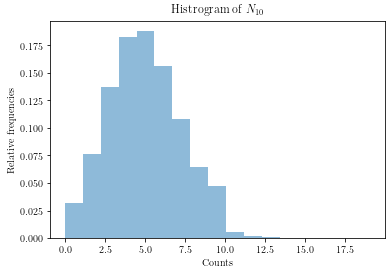

In [6]:
fig, ax = plt.subplots()
weights = np.ones_like(sample) / len(sample)
ax.hist(sample, bins=17, weights=weights, histtype='bar', alpha=0.5)
ax.set_ylabel(r'Relative frequencies')
ax.set_xlabel(r'Counts')
ax.set_title(r'Histrogram of $N_{10}$')
plt.show()

### (c)

In [139]:
alpha = 0.5
lam = 1.0 / alpha

N = []
time = []    

for k in range(10):
    cur_time = [0]
    cur_N = [0]
    i = 1
    while True:
        if cur_time[i-1] >= 10:
            break
        t = expon.rvs(scale=lam)
        cur_N.append(cur_N[i-1] + 1) 
        cur_time.append(cur_time[i-1] + t)
        i += 1
    N.append(cur_N)
    time.append(cur_time)

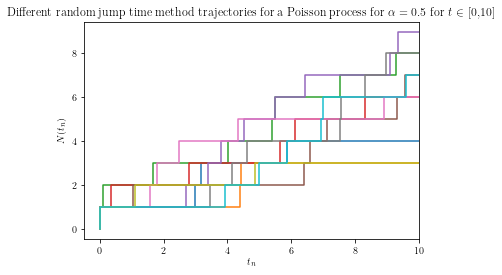

In [140]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$N(t_n)$')
ax.set_xlabel(r'$t_{n}$')
ax.set_title(r'Different random jump time method trajectories for a Poisson process for $\alpha = 0.5$ for $t$ $\in$ [0,10]')
ax.set_xlim(-0.5, 10)
for k in range(10):
    ax.step(time[k], N[k])
plt.show()

### (d)

In [50]:
alpha = 0.5
L = 9e5
lam = 1.0 / alpha
sample = np.zeros(int(L), dtype="int64")

for l in range(int(L)):
    N = 0
    time = 0
    while True:
        if time >= 10:
            break
        t = expon.rvs(scale=lam)
        N += 1
        time += t
    sample[l] = N

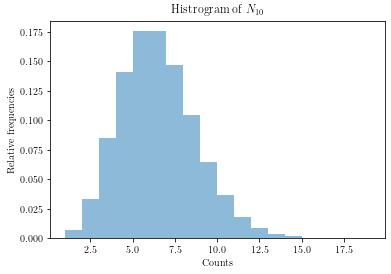

In [51]:
fig, ax = plt.subplots()
weights = np.ones_like(sample) / len(sample)
ax.hist(sample, bins=18, weights=weights, histtype='bar', alpha=0.5)
ax.set_ylabel(r'Relative frequencies')
ax.set_xlabel(r'Counts')
ax.set_title(r'Histrogram of $N_{10}$')
plt.show()

### (e)

### Comparison:

The two methods for the most produce results that are nearly identical. An obvious difference I can see between the methods is that the random jump time method seems to be explorative than the discrete time method. In relatively short amount of time, this method explores a larger fraction of the sample space than the discrete time method.

## Q6

### (a)

In [118]:
alpha = 0.5
beta = 1.0
w_birth = alpha / (alpha + beta)
lam = 1.0 / (alpha + beta)
N = []
time = []

for k in range(20):
    cur_time = [0]
    cur_N = [10]
    i = 1
    while True:
        if cur_time[i-1] >= 10:
            break
        t = expon.rvs(scale=lam)
        if cur_N[i-1] >= 1:   
            u = random.random()
            if u < w_birth:
                cur_N.append(cur_N[i-1] + 1)
            else:
                cur_N.append(cur_N[i-1] - 1)
            cur_time.append(cur_time[i-1] + t)
        else:
            cur_N.append(cur_N[i-1])
            cur_time.append(cur_time[i-1] + t)
        i += 1
    N.append(cur_N)
    time.append(cur_time)

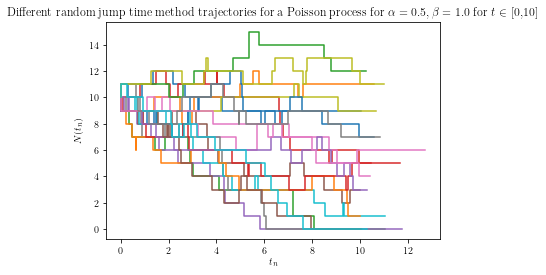

In [121]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$N(t_n)$')
ax.set_xlabel(r'$t_{n}$')
ax.set_title(r'Different random jump time method trajectories for a Poisson process for $\alpha = 0.5, \beta=1.0$ for $t$ $\in$ [0,10]')

for k in range(20):
    ax.step(time[k], N[k])
plt.show()


### (b)

In [122]:
alpha = 0.5
beta = 1.0
L = 9e5
w_birth = alpha / (alpha + beta)
lam = 1.0 / (alpha + beta)

sample = np.zeros(int(L), dtype="int64")

for l in range(int(L)):
    N = 5
    time = 0
    i = 1
    while True:
        if time >= 10:
            break
        t = expon.rvs(scale=lam)
        if N >= 1:
            u = random.random()
            if u < w_birth:
                N += 1
            else:
                N -= 1
            time += t
        else:
            break
        i += 1
    sample[l] = N

In [123]:
p = np.bincount(sample)
print(p[0] / L)

0.6673955555555555


### (c)

In [126]:
alpha = 0.5
beta = 1.0
L = 9e5
w_birth = alpha / (alpha + beta)
lam = 1.0 / (alpha + beta)

sample = np.zeros(int(L), dtype="float64")

for l in range(int(L)):
    N = 10
    time = 0
    while True:
        t = expon.rvs(scale=lam)
        if N >= 1:
            u = random.random()
            if u < w_birth:
                N += 1
            else:
                N -= 1
            time += t
        else:
            break
    sample[l] = time

In [127]:
np.mean(sample)

19.999623670495975

### (d)

In [128]:
delta_t = 0.10
alpha = 0.5
beta = 1.0
L = 9e5
w_birth = alpha / (alpha + beta)
lam = 1.0 / (alpha + beta)

N = np.arange(5, 15)
samples = np.zeros((len(N),int(L)), dtype="float64")

for i in range(len(N)):
    for l in range(int(L)):
        cur_N = N[i]
        time = 0
        while True:
            t = expon.rvs(scale=lam)
            if cur_N >= 1:
                u = random.random()
                if u < w_birth:
                    cur_N += 1
                else:
                    cur_N -= 1
                time += t
            else:
                break
        samples[i][l] = time

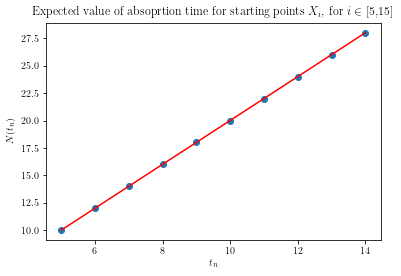

In [135]:
fig, ax = plt.subplots()
ax.set_ylabel(r'$N(t_n)$')
ax.set_xlabel(r'$t_{n}$')
ax.set_title(r'Expected value of absoprtion time for starting points $X_i$, for $i$ $\in$ [5,15]')
means = [np.mean(samples[i]) for i in range(len(N))]
m, c = np.polyfit(N, means, 1)
ax.plot(N, means, 'o', N, N*m + c, '-r')
plt.show()

The expected value of the absorption time increases linearly with the increasing value of the starting point $X_i$. Ofcourse this makes me sense in the context of Q4(b), we can (approximately, since the steps are not equal) think of the random variable $\tau_10$ as birth process with the rate $\lambda_n = \nu$ where $\lambda = 0$ was substituted for in the equation in Q4(b). Then the derivative of the expectated value would $\dot{m}(t) = \nu$. Which then clearly reflected in plot above as $\dot{T}^{\text{abs}}(i) = 2.0$